In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from tqdm import tqdm 

In [3]:
datadir = 'mydata'

cat = ['men','women']

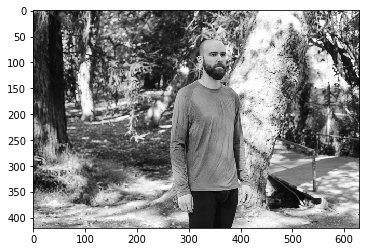

In [4]:
for cats in cat: 
    path = os.path.join(datadir,cats)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        
        break 
    break 

In [5]:
print(img_array)
print(img_array.shape)
IMG_size = 70

[[ 87 138 175 ... 202 160 172]
 [ 78 127 159 ... 163 119 152]
 [ 61 122 156 ... 131 147 170]
 ...
 [166 157 170 ... 126 148 148]
 [149 161 167 ... 156 156 162]
 [175 181 170 ... 148 155 168]]
(420, 630)


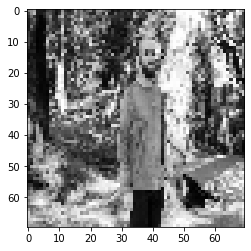

In [6]:
new_array = cv2.resize(img_array,(IMG_size,IMG_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
tranining_data = []

def creat_data():
    for i in cat:  

        path = os.path.join(datadir,i) 
        class_num = cat.index(i) 

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_size, IMG_size))  
                tranining_data.append([new_array, class_num])
            except Exception as e:  
                pass


In [8]:
creat_data()

100%|██████████| 1912/1912 [00:17<00:00, 108.35it/s]


In [9]:
print(len(tranining_data))

3311


In [10]:
import random 
random.shuffle(tranining_data)

In [11]:
for i in tranining_data[:10]:
    print(i[1])

0
1
1
1
1
1
0
1
1
0


In [12]:
x = []
y = []

for feature,label in tranining_data:
    x.append(feature)
    y.append(label)

In [13]:
print(x[0].reshape(-1, IMG_size, IMG_size, 1))

[[[[ 66]
   [ 59]
   [ 74]
   ...
   [ 66]
   [ 59]
   [ 58]]

  [[ 71]
   [ 65]
   [ 80]
   ...
   [ 75]
   [ 72]
   [ 71]]

  [[ 65]
   [ 62]
   [ 76]
   ...
   [ 72]
   [ 69]
   [ 72]]

  ...

  [[ 88]
   [ 91]
   [ 92]
   ...
   [105]
   [100]
   [ 97]]

  [[ 79]
   [ 81]
   [ 82]
   ...
   [ 88]
   [ 89]
   [ 79]]

  [[ 81]
   [ 77]
   [ 82]
   ...
   [ 96]
   [ 80]
   [ 59]]]]


In [14]:
X = np.array(x).reshape(-1,IMG_size,IMG_size,1)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

X = X/255.0

In [25]:
dence_leys = [0]
conv_leys = [3]
ley_sizes = [64]

In [26]:
for dence_ley in dence_leys:
    for ley_size in ley_sizes:
        for conv_ley in conv_leys:
            NAME = "{}-con-{}-node-{}-dense-{}".format(conv_ley,ley_size,dence_ley, int(time.time()))
            print(NAME)
            model = Sequential()
            
            model.add(Conv2D(ley_size,(3,3),input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for i in range(conv_ley-1): 
                model.add(Conv2D(ley_size,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            model.add(Flatten())
            
            for j in range(dence_ley):
                model.add(Dense(ley_size))
                model.add(Activation('relu'))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            
            tensorboard = TensorBoard(log_dir='log/{}'.format(NAME))
            
            model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
            
            model.fit(X,y,batch_size=32,epochs=50,validation_split=0.2,callbacks=[tensorboard])
            
model.save('64*64*3-CNN.model')           
            

W0831 19:59:13.904817 139636348942144 deprecation.py:323] From /home/deepak/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


3-con-64-node-0-dense-1567261753
Train on 2648 samples, validate on 663 samples
Epoch 1/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.6805 - acc: 0.5767 - val_loss: 0.6695 - val_acc: 0.5807
Epoch 2/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.6585 - acc: 0.6118 - val_loss: 0.6413 - val_acc: 0.6456
Epoch 3/50
2648/2648 [==============================] - 23s 9ms/sample - loss: 0.6259 - acc: 0.6507 - val_loss: 0.6636 - val_acc: 0.6199
Epoch 4/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.6066 - acc: 0.6669 - val_loss: 0.6462 - val_acc: 0.6425
Epoch 5/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.5714 - acc: 0.6937 - val_loss: 0.6161 - val_acc: 0.6561
Epoch 6/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.5377 - acc: 0.7289 - val_loss: 0.6094 - val_acc: 0.6682
Epoch 7/50
2648/2648 [==============================] - 22s 8ms/sample - loss: 0.5056 - acc: 0.751

In [29]:
import cv2 
import tensorflow as tf 

lable = ['men', 'women']

def prepare(filpath):
    img_size=70
    img_array=cv2.imread(filpath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1, img_size,img_size,1)

prediction = model.predict([prepare('test.jpg')])
print(prediction)

[[1.]]
